### <span style= "color :red"> 순환신경망 </span>
- 순차데이터를 위해 사용하는 신경망의 한 종류 
- 이전 데이터의 학습 결과를 다음 데이터의 학습에 일정량의 가중치를 곱하여 학습하는 신경망

In [3]:
from tensorflow import keras 
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=500)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [6]:
print("리뷰 데이터 : ",train_input[0])                  # 단어사전에 없는 단어는 2로 표현 
print("리뷰 데이터 정답 : ",train_target[:10])

리뷰 데이터 :  [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
리뷰 데이터 정답 :  [1 0 0 1 0 0 1 0 1 0]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)

(20000,) (20000,)
(5000,) (5000,)


- 데이터의 길이 시각화 

In [8]:
import numpy as np
lengths = np.array([len(i) for i in train_input])

print("평균 길이 :",np.mean(lengths))
print("표준편차 : ",np.std(lengths))

평균 길이 : 239.00925
표준편차 :  176.67367592382715


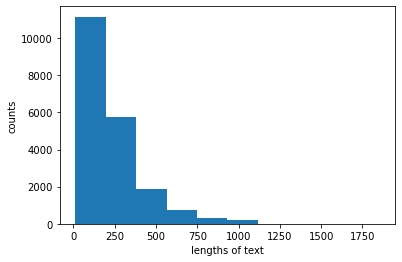

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel("lengths of text")
plt.ylabel("counts")
plt.show()

- 리뷰 데이터의 길이를 맞추기

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)          # 리뷰의 최대 길이 지정 (100보다 짧으면 0으로 채우고 길면 앞부분을 짜른다)
val_seq = pad_sequences(val_input, maxlen=100)
print(train_seq.shape, train_seq[0].shape)
print(val_seq.shape, val_seq[0].shape)

(20000, 100) (100,)
(5000, 100) (100,)


- 원핫 인코딩 : 리뷰 데이터의 정수 인덱스의 크기속성을 제거 

In [14]:
from tensorflow import keras

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

print(train_oh.shape)
print(val_oh.shape)

(20000, 100, 500)
(5000, 100, 500)


- 순환신경망 생성

In [15]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))         # 100 : 리뷰 길이, 500 : 단어사전 갯수 
model.add(keras.layers.Dense(1, activation="sigmoid"))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = rmsprop, loss="binary_crossentropy", metrics = "accuracy")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


- 모델 훈련 및 시각화

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6865 - accuracy: 0.5480 - val_loss: 0.6706 - val_accuracy: 0.5912
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6603 - accuracy: 0.6160 - val_loss: 0.6507 - val_accuracy: 0.6368
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6398 - accuracy: 0.6550 - val_loss: 0.6308 - val_accuracy: 0.6672
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6217 - accuracy: 0.6817 - val_loss: 0.6144 - val_accuracy: 0.6892
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6044 - accuracy: 0.7026 - val_loss: 0.5973 - val_accuracy: 0.7138
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5879 - accuracy: 0.7213 - val_loss: 0.5847 - val_accuracy: 0.7228
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5739 - accuracy: 0.7355 - val_loss: 0.5701 - val_accuracy:

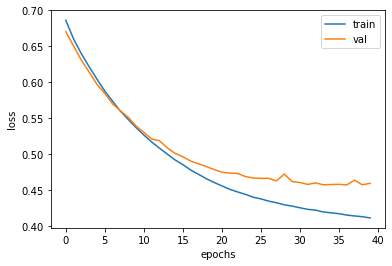

In [16]:
check_cb = keras.callbacks.ModelCheckpoint("best-simpleRnn.h5")
er_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, 
                    epochs = 100,
                    batch_size = 64,
                    callbacks=[check_cb, er_stop], 
                    validation_data=[val_oh,val_target])



import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

###  단어 임베딩 
- 의미 : 각 단어를 고정된 크기의 실수 벡터로 바꿔주는 방법 
- 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 백터로 변환하는 작업
- 각 단어간의 의미를 고려한 단어 정규화 방법

In [22]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))     # 500 : 어휘사전크기, 16 : 임베딩 백터 크기 , 100 : 입력시퀀스의 길이
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics="accuracy")

check_cb = keras.callbacks.ModelCheckpoint("best-embedding.h5")
er_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.fit(train_seq, train_target, 
          epochs=100, batch_size=64, 
          validation_data=(val_seq, val_target), 
          callbacks=[check_cb, er_stop])

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6957 - accuracy: 0.5065 - val_loss: 0.6932 - val_accuracy: 0.5182
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6907 - accuracy: 0.5300 - val_loss: 0.6910 - val_accuracy: 0.5256
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6870 - accuracy: 0.5484 - val_loss: 0.6894 - val_accuracy: 0.5322
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6834 - accuracy: 0.5666 - val_loss: 0.6879 - val_accuracy: 0.5380
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6796 - accuracy: 0.5800 - val_loss: 0.6864 - val_accuracy: 0.5462
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6756 - accuracy: 0.5928 - val_loss: 0.6851 - val_accuracy: 0.5542
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6714 - accuracy: 0.6005 - val_loss: 0.6841 - val_accuracy: 0.5562

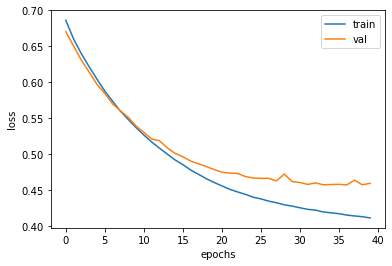

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()